In [3]:
import keras

/home/surya/.conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot 

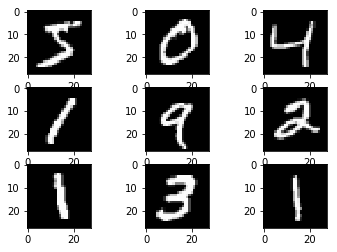

In [5]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [18]:
# Baseline MLP for MNIST dataset
import numpy
import matplotlib.pyplot as plt

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

In [20]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [21]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [23]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [24]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [31]:
# define baseline model
def baseline_model(opt):
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Fit the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))
    print("Accuracy of {} model  is {} %".format(opt,scores[1]*100))
    return history


In [32]:
# build the model
model1 = baseline_model('adam')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2821 - acc: 0.9199 - val_loss: 0.1414 - val_acc: 0.9587
Epoch 2/10
 - 8s - loss: 0.1115 - acc: 0.9677 - val_loss: 0.1001 - val_acc: 0.9703
Epoch 3/10
 - 8s - loss: 0.0716 - acc: 0.9794 - val_loss: 0.0800 - val_acc: 0.9759
Epoch 4/10
 - 8s - loss: 0.0503 - acc: 0.9855 - val_loss: 0.0754 - val_acc: 0.9770
Epoch 5/10
 - 8s - loss: 0.0363 - acc: 0.9898 - val_loss: 0.0659 - val_acc: 0.9793
Epoch 6/10
 - 8s - loss: 0.0265 - acc: 0.9933 - val_loss: 0.0643 - val_acc: 0.9803
Epoch 7/10
 - 8s - loss: 0.0195 - acc: 0.9954 - val_loss: 0.0664 - val_acc: 0.9800
Epoch 8/10
 - 8s - loss: 0.0145 - acc: 0.9968 - val_loss: 0.0606 - val_acc: 0.9815
Epoch 9/10
 - 8s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0624 - val_acc: 0.9805
Epoch 10/10
 - 8s - loss: 0.0081 - acc: 0.9986 - val_loss: 0.0616 - val_acc: 0.9817
Baseline Error: 1.83%
Accuracy of adam model  is 98.17 %


In [33]:
model2 = baseline_model('adagrad')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2621 - acc: 0.9275 - val_loss: 0.1365 - val_acc: 0.9597
Epoch 2/10
 - 7s - loss: 0.1170 - acc: 0.9672 - val_loss: 0.1057 - val_acc: 0.9697
Epoch 3/10
 - 7s - loss: 0.0874 - acc: 0.9760 - val_loss: 0.0933 - val_acc: 0.9717
Epoch 4/10
 - 7s - loss: 0.0713 - acc: 0.9804 - val_loss: 0.0839 - val_acc: 0.9738
Epoch 5/10
 - 7s - loss: 0.0601 - acc: 0.9839 - val_loss: 0.0786 - val_acc: 0.9766
Epoch 6/10
 - 8s - loss: 0.0519 - acc: 0.9871 - val_loss: 0.0737 - val_acc: 0.9772
Epoch 7/10
 - 7s - loss: 0.0454 - acc: 0.9889 - val_loss: 0.0709 - val_acc: 0.9787
Epoch 8/10
 - 7s - loss: 0.0406 - acc: 0.9901 - val_loss: 0.0684 - val_acc: 0.9785
Epoch 9/10
 - 7s - loss: 0.0364 - acc: 0.9916 - val_loss: 0.0666 - val_acc: 0.9798
Epoch 10/10
 - 7s - loss: 0.0328 - acc: 0.9929 - val_loss: 0.0638 - val_acc: 0.9810
Baseline Error: 1.90%
Accuracy of adagrad model  is 98.1 %


In [34]:
model3 = baseline_model('SGD')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 1.1922 - acc: 0.7363 - val_loss: 0.6923 - val_acc: 0.8565
Epoch 2/10
 - 7s - loss: 0.5948 - acc: 0.8633 - val_loss: 0.4912 - val_acc: 0.8806
Epoch 3/10
 - 6s - loss: 0.4709 - acc: 0.8821 - val_loss: 0.4157 - val_acc: 0.8933
Epoch 4/10
 - 6s - loss: 0.4143 - acc: 0.8917 - val_loss: 0.3754 - val_acc: 0.9005
Epoch 5/10
 - 7s - loss: 0.3802 - acc: 0.8985 - val_loss: 0.3492 - val_acc: 0.9058
Epoch 6/10
 - 7s - loss: 0.3566 - acc: 0.9034 - val_loss: 0.3298 - val_acc: 0.9113
Epoch 7/10
 - 8s - loss: 0.3387 - acc: 0.9077 - val_loss: 0.3154 - val_acc: 0.9139
Epoch 8/10
 - 7s - loss: 0.3243 - acc: 0.9105 - val_loss: 0.3030 - val_acc: 0.9169
Epoch 9/10
 - 7s - loss: 0.3125 - acc: 0.9141 - val_loss: 0.2925 - val_acc: 0.9187
Epoch 10/10
 - 7s - loss: 0.3022 - acc: 0.9165 - val_loss: 0.2844 - val_acc: 0.9216
Baseline Error: 7.84%
Accuracy of SGD model  is 92.16 %


In [35]:
model4 = baseline_model('adamax')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2908 - acc: 0.9177 - val_loss: 0.1691 - val_acc: 0.9526
Epoch 2/10
 - 8s - loss: 0.1412 - acc: 0.9601 - val_loss: 0.1179 - val_acc: 0.9660
Epoch 3/10
 - 8s - loss: 0.0997 - acc: 0.9714 - val_loss: 0.0948 - val_acc: 0.9729
Epoch 4/10
 - 8s - loss: 0.0749 - acc: 0.9788 - val_loss: 0.0862 - val_acc: 0.9735
Epoch 5/10
 - 8s - loss: 0.0588 - acc: 0.9839 - val_loss: 0.0742 - val_acc: 0.9774
Epoch 6/10
 - 8s - loss: 0.0467 - acc: 0.9875 - val_loss: 0.0641 - val_acc: 0.9801
Epoch 7/10
 - 8s - loss: 0.0385 - acc: 0.9899 - val_loss: 0.0669 - val_acc: 0.9796
Epoch 8/10
 - 9s - loss: 0.0307 - acc: 0.9926 - val_loss: 0.0597 - val_acc: 0.9821
Epoch 9/10
 - 8s - loss: 0.0250 - acc: 0.9941 - val_loss: 0.0587 - val_acc: 0.9817
Epoch 10/10
 - 8s - loss: 0.0201 - acc: 0.9958 - val_loss: 0.0572 - val_acc: 0.9820
Baseline Error: 1.80%
Accuracy of adamax model  is 98.2 %


In [36]:
model5 = baseline_model('rmsprop')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2712 - acc: 0.9210 - val_loss: 0.1388 - val_acc: 0.9585
Epoch 2/10
 - 7s - loss: 0.1055 - acc: 0.9687 - val_loss: 0.0859 - val_acc: 0.9746
Epoch 3/10
 - 7s - loss: 0.0686 - acc: 0.9794 - val_loss: 0.0707 - val_acc: 0.9791
Epoch 4/10
 - 7s - loss: 0.0487 - acc: 0.9854 - val_loss: 0.0726 - val_acc: 0.9771
Epoch 5/10
 - 7s - loss: 0.0347 - acc: 0.9897 - val_loss: 0.0647 - val_acc: 0.9797
Epoch 6/10
 - 7s - loss: 0.0266 - acc: 0.9919 - val_loss: 0.0658 - val_acc: 0.9800
Epoch 7/10
 - 8s - loss: 0.0194 - acc: 0.9945 - val_loss: 0.0590 - val_acc: 0.9832
Epoch 8/10
 - 7s - loss: 0.0142 - acc: 0.9959 - val_loss: 0.0593 - val_acc: 0.9823
Epoch 9/10
 - 8s - loss: 0.0111 - acc: 0.9970 - val_loss: 0.0608 - val_acc: 0.9816
Epoch 10/10
 - 8s - loss: 0.0083 - acc: 0.9978 - val_loss: 0.0718 - val_acc: 0.9816
Baseline Error: 1.84%
Accuracy of rmsprop model  is 98.16 %


In [38]:
model6 = baseline_model('adadelta')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.3254 - acc: 0.9081 - val_loss: 0.1804 - val_acc: 0.9444
Epoch 2/10
 - 9s - loss: 0.1413 - acc: 0.9594 - val_loss: 0.1140 - val_acc: 0.9661
Epoch 3/10
 - 10s - loss: 0.0977 - acc: 0.9717 - val_loss: 0.0904 - val_acc: 0.9725
Epoch 4/10
 - 9s - loss: 0.0736 - acc: 0.9792 - val_loss: 0.0824 - val_acc: 0.9748
Epoch 5/10
 - 9s - loss: 0.0576 - acc: 0.9834 - val_loss: 0.0731 - val_acc: 0.9781
Epoch 6/10
 - 9s - loss: 0.0466 - acc: 0.9869 - val_loss: 0.0733 - val_acc: 0.9761
Epoch 7/10
 - 9s - loss: 0.0382 - acc: 0.9896 - val_loss: 0.0616 - val_acc: 0.9800
Epoch 8/10
 - 9s - loss: 0.0314 - acc: 0.9920 - val_loss: 0.0601 - val_acc: 0.9811
Epoch 9/10
 - 9s - loss: 0.0259 - acc: 0.9938 - val_loss: 0.0600 - val_acc: 0.9808
Epoch 10/10
 - 9s - loss: 0.0215 - acc: 0.9951 - val_loss: 0.0592 - val_acc: 0.9819
Baseline Error: 1.81%
Accuracy of adadelta model  is 98.19 %


In [39]:
model7 = baseline_model('nadam')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2294 - acc: 0.9332 - val_loss: 0.1026 - val_acc: 0.9674
Epoch 2/10
 - 9s - loss: 0.0824 - acc: 0.9758 - val_loss: 0.0902 - val_acc: 0.9727
Epoch 3/10
 - 9s - loss: 0.0497 - acc: 0.9847 - val_loss: 0.0711 - val_acc: 0.9774
Epoch 4/10
 - 9s - loss: 0.0317 - acc: 0.9905 - val_loss: 0.0636 - val_acc: 0.9801
Epoch 5/10
 - 9s - loss: 0.0219 - acc: 0.9936 - val_loss: 0.0658 - val_acc: 0.9810
Epoch 6/10
 - 9s - loss: 0.0157 - acc: 0.9956 - val_loss: 0.0694 - val_acc: 0.9806
Epoch 7/10
 - 9s - loss: 0.0106 - acc: 0.9970 - val_loss: 0.0600 - val_acc: 0.9827
Epoch 8/10
 - 9s - loss: 0.0075 - acc: 0.9980 - val_loss: 0.0802 - val_acc: 0.9784
Epoch 9/10
 - 9s - loss: 0.0076 - acc: 0.9981 - val_loss: 0.0631 - val_acc: 0.9824
Epoch 10/10
 - 9s - loss: 0.0068 - acc: 0.9981 - val_loss: 0.0764 - val_acc: 0.9805
Baseline Error: 1.95%
Accuracy of nadam model  is 98.05 %


In [48]:
def printplot(history,opt):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('{} model accuracy'.format(opt))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('{} model loss'.format(opt))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


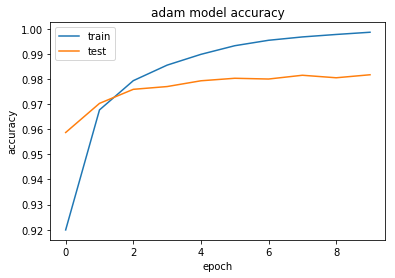

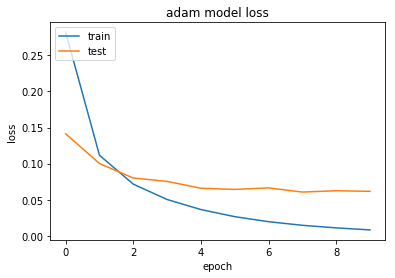

In [49]:
printplot(model1,'adam')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


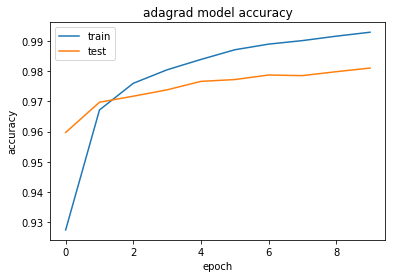

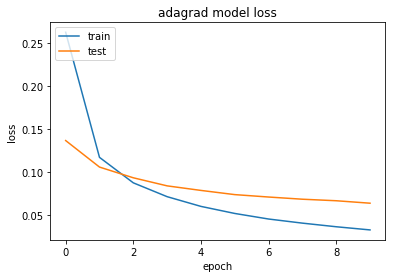

In [50]:
printplot(model2,'adagrad')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


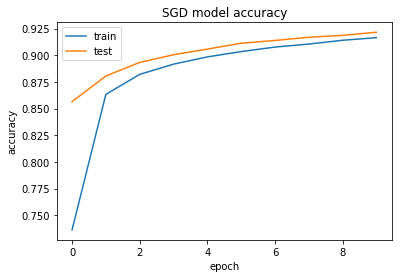

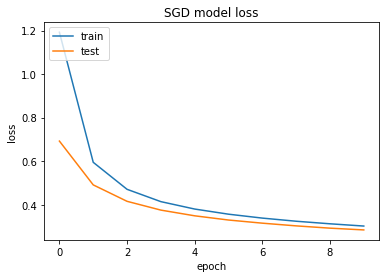

In [51]:
printplot(model3,'SGD')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


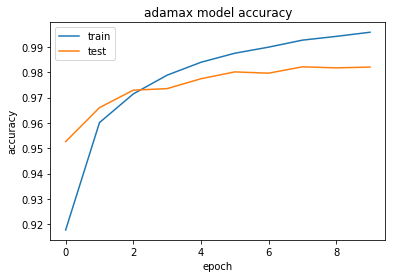

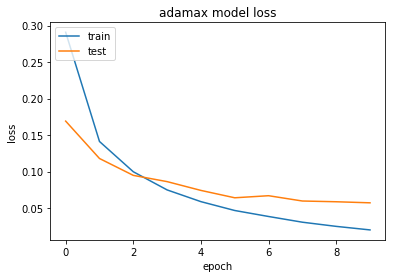

In [52]:
printplot(model4,'adamax')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


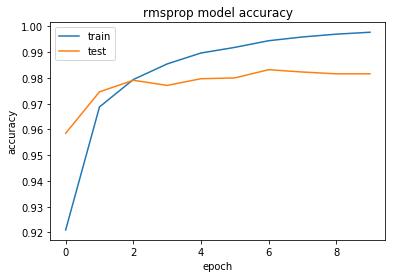

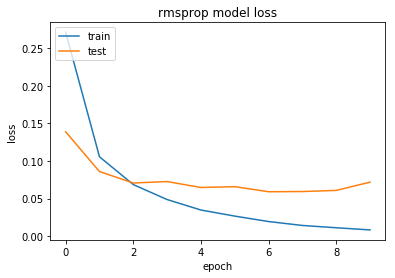

In [53]:
printplot(model5,'rmsprop')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


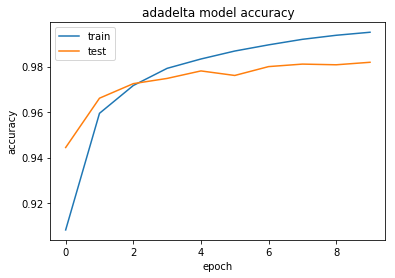

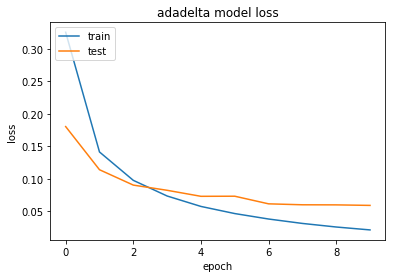

In [54]:
printplot(model6,'adadelta')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


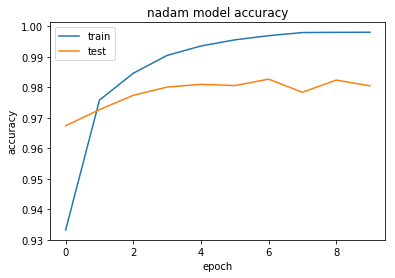

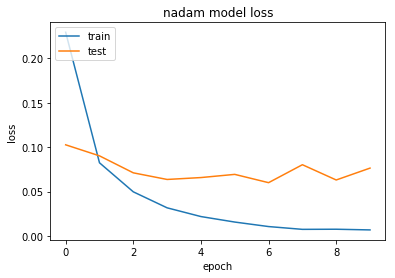

In [55]:
printplot(model7,'nadam')